In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import json
import pandas as pd
import numpy as np
from tqdm import tqdm

pd.options.display.max_columns = 150
pd.options.display.max_rows = 150

In [3]:
# load data
with open("../songs_db.json") as f:
    songs_db = json.load(f)

print(f"Data was updated on {songs_db['latest_ts']}")
print("Dict keys=", list(songs_db.keys()))

Data was updated on 2020-08-14T20:20:43+0000
Dict keys= ['songs_dic', 'broken_ts_list', 'latest_ts']


In [3]:
# create datafram
df = pd.DataFrame.from_dict(songs_db["songs_dic"], orient="index")
df.reset_index(level=0, inplace=True)
df.columns = ["time", "name"]
df["time"] = pd.to_datetime(df.time)
df = df.sort_values("time").reset_index(drop=True)

df.tail()

,time,name
1318460,2022-11-01 05:12:56+00:00,Danny Elfman - Oogie Boogie's Song (Jack O' Mi...
1318461,2022-11-01 05:18:26+00:00,JackG - Grim Grinning Ghosts (JackG Remix)
1318462,2022-11-01 05:21:28+00:00,Boris Karloff - Monster Mash
1318463,2022-11-01 05:24:28+00:00,Andrew Gold - It Must Be Halloween
1318464,2022-11-01 05:29:37+00:00,まめこ - MONSTER CANDY FACTORY


### Time stats


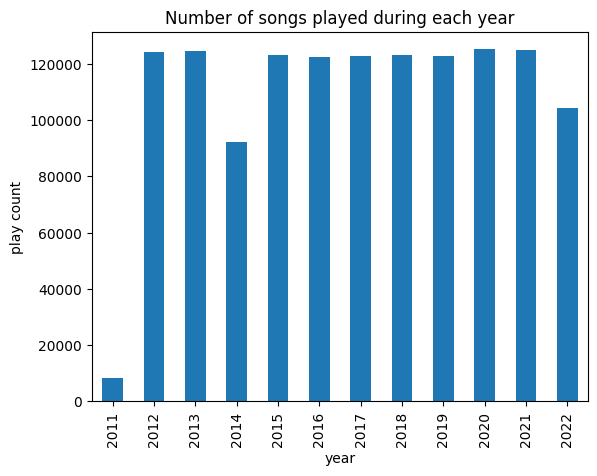

In [4]:
counts = df.groupby(df.time.dt.year).count()
ax = counts.plot(y="name", kind="bar", legend=False)
ax.set_title("Number of songs played during each year")
_ = ax.set(xlabel="year", ylabel="play count")

### Top songs


In [5]:
songs = df.name.value_counts().rename_axis("song_name").reset_index(name="play counts")

print(f"A total of {len(songs)} unique songs have been played on r/a/dio")

songs.head(25)

A total of 128070 unique songs have been played on r/a/dio


,song_name,play counts
0,FLOW - COLORS,1114
1,Supercell - Feel so good,812
2,Seira Kagami - Super Special,630
3,Nothing's Carved in Stone - Out of Control,617
4,#comiket - trainroll,608
5,アフィリア・サーガ - ネプチューヌ☆サガして,566
6,Carlito - GO! GO! CARLITO!,547
7,MAN WITH A MISSION - Raise your flag,545
8,Abingdon Boys School - Howling,528
9,Kaneda Tomoko - Ganbara,524


In [6]:
print("Some play count stats")
songs.describe()

Some play count stats


,play counts
count,128070.000000
mean,10.294878
std,27.981704
min,1.000000
25%,1.000000
50%,1.000000
75%,3.000000
max,1114.000000


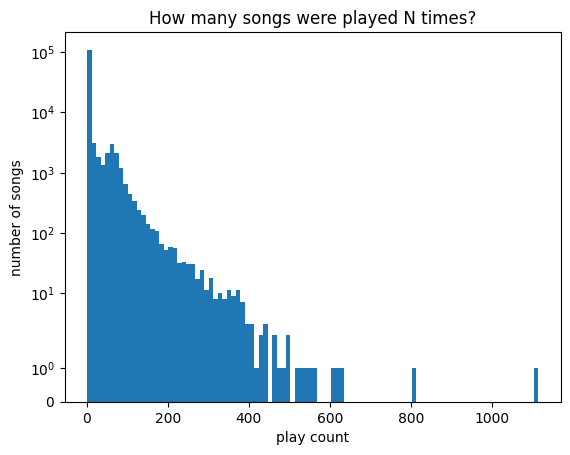

In [7]:
ax = plt.subplot()
ax.set_yscale("symlog")
ax.hist(songs["play counts"], bins=100)
ax.set_ylabel("number of songs")
ax.set_title("How many songs were played N times?")
_ = ax.set_xlabel("play count")

In [8]:
time_stats = df.groupby("name").time.agg(["min", "max", "count"])
time_stats["dif"] = time_stats["max"] - time_stats["min"]
time_stats["freq"] = time_stats["dif"] / time_stats["count"]
time_stats.columns = ["First played", "Last played", "count", "dif", "freq"]

Most frequently played songs with count > 20, difference between the first \
and the last plays > 7 days, and last played in last 2 years to remove outliers


In [9]:
time_stats[
    (time_stats["count"] > 20)
    & (time_stats["dif"] > pd.Timedelta(365, "D"))
    & (
        time_stats["Last played"]
        > pd.to_datetime("now", utc=True) - pd.to_timedelta(365 * 2, "d")
    )
].sort_values("freq").head(20)

,First played,Last played,count,dif,freq
name,,,,,
FLOW - COLORS,2012-01-08 22:54:06+00:00,2022-10-29 04:03:05+00:00,1114,3946 days 05:08:59,3 days 13:01:01.884201077
MAN WITH A MISSION - Raise your flag,2015-10-17 01:42:53+00:00,2022-10-22 03:09:31+00:00,545,2562 days 01:26:38,4 days 16:49:28.803669724
Supercell - Feel so good,2011-12-14 00:02:36+00:00,2022-10-15 10:07:07+00:00,812,3958 days 10:04:31,4 days 20:59:51.466748768
Nothing's Carved in Stone - Out of Control,2013-02-02 09:32:40+00:00,2022-10-29 03:59:37+00:00,617,3555 days 18:26:57,5 days 18:18:42.880064829
アフィリア・サーガ - ネプチューヌ☆サガして,2013-07-27 02:33:00+00:00,2022-10-12 22:57:13+00:00,566,3364 days 20:24:13,5 days 22:40:44.969964664
Seira Kagami - Super Special,2011-12-25 08:26:33+00:00,2022-10-21 18:03:44+00:00,630,3953 days 09:37:11,6 days 06:36:20.684126984
#comiket - trainroll,2012-04-11 22:06:11+00:00,2022-10-22 21:30:14+00:00,608,3845 days 23:24:03,6 days 07:48:53.294407894
Lucy Rose - Shiver,2014-05-01 22:40:40+00:00,2022-10-28 21:21:55+00:00,489,3101 days 22:41:15,6 days 08:14:33.773006134
"Casey Edwards, Victor Borba - Bury the Light",2020-09-21 22:30:49+00:00,2022-10-20 22:53:10+00:00,113,759 days 00:22:21,6 days 17:12:24.610619469


Colors have been played since 2012 every 3 days...


In [10]:
print("Most infrequently played with play count > 1")
time_stats.sort_values("freq", ascending=False).head(10)

Most infrequently played with play count > 1


,First played,Last played,count,dif,freq
name,,,,,
Choro Club feat. Senoo - AQUA -speedy-,2011-11-15 19:30:21+00:00,2022-10-15 09:16:41+00:00,2,3986 days 13:46:20,1993 days 06:53:10
Perfume - Macaroni,2011-11-05 14:16:39+00:00,2022-09-01 11:49:54+00:00,2,3952 days 21:33:15,1976 days 10:46:37.500000
UbiQuinta - Tatakai no Unmei,2011-11-17 06:20:02+00:00,2022-09-12 21:53:45+00:00,2,3952 days 15:33:43,1976 days 07:46:51.500000
Perfume - Spice,2011-11-06 22:01:03+00:00,2022-08-31 18:01:11+00:00,2,3950 days 20:00:08,1975 days 10:00:04
DJ Sa9 vs. Hommarju feat. YURiE - oblivious,2011-11-14 22:33:58+00:00,2022-06-18 01:39:13+00:00,2,3868 days 03:05:15,1934 days 01:32:37.500000
The Seatbelts - ROUYA,2012-04-10 23:37:57+00:00,2022-10-27 04:02:17+00:00,2,3851 days 04:24:20,1925 days 14:12:10
Mikuni Shimokawa - Bird,2012-02-14 23:49:03+00:00,2022-08-31 18:48:18+00:00,2,3850 days 18:59:15,1925 days 09:29:37.500000
Nakamura Miyu - Utawarerumono,2011-11-20 16:22:20+00:00,2022-05-17 22:53:16+00:00,2,3831 days 06:30:56,1915 days 15:15:28
Nakamura Miyu - Karera no Theme,2011-12-03 08:33:19+00:00,2022-05-17 23:39:41+00:00,2,3818 days 15:06:22,1909 days 07:33:11


New songs by year


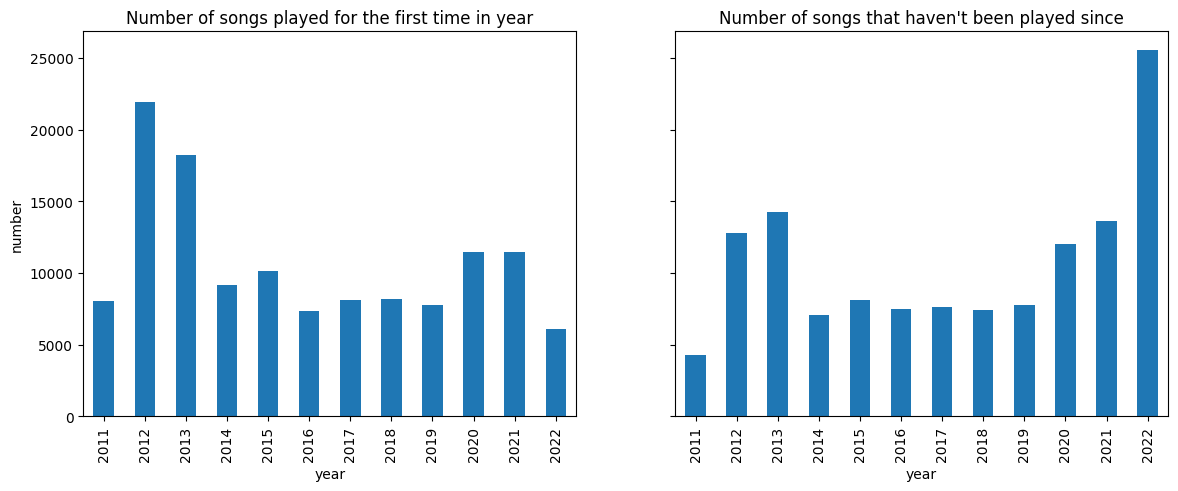

In [11]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(14, 5), sharey=True)

counts = time_stats.groupby(time_stats["First played"].dt.year).count()
ax = counts.plot(y="count", kind="bar", legend=False, ax=ax1)
ax.set_title("Number of songs played for the first time in year")
_ = ax.set(xlabel="year", ylabel="number")

counts = time_stats.groupby(time_stats["Last played"].dt.year).count()
ax = counts.plot(y="count", kind="bar", legend=False, ax=ax2)
ax.set_title("Number of songs that haven't been played since")
_ = ax.set(xlabel="year", ylabel="number")

It seems each year about ~10000 new songs are added and similar number is retired


In [12]:
time_stats.reset_index().loc[lambda df: df.name.str.lower().str.contains("re:union")]

,name,First played,Last played,count,dif,freq
37237,K-system - Re:Union,2016-02-22 16:59:13+00:00,2022-09-01 15:36:18+00:00,41,2382 days 22:37:05,58 days 02:53:35.243902439


In [13]:
time_stats.reset_index().loc[
    lambda df: df.name.str.lower().str.contains("aimer")
].sort_values("count", ascending=False)

,name,First played,Last played,count,dif,freq
6554,Aimer - Brave Shine,2015-06-04 22:29:29+00:00,2022-10-09 00:31:00+00:00,226,2683 days 02:01:31,11 days 20:55:45.535398230
6571,Aimer - LAST STARDUST,2015-07-26 12:53:42+00:00,2022-10-25 13:55:16+00:00,180,2648 days 01:01:34,14 days 17:04:20.522222222
6580,Aimer - RE:I AM,2013-03-23 11:05:07+00:00,2022-10-11 09:53:41+00:00,116,3488 days 22:48:34,30 days 01:51:06.500000
6638,Aimer with chelly (EGOIST) - ninelie,2016-05-27 19:14:22+00:00,2022-10-25 02:43:10+00:00,111,2341 days 07:28:48,21 days 02:13:46.378378378
6586,Aimer - Rokutosei no Yoru,2012-01-12 11:15:48+00:00,2022-10-12 09:12:46+00:00,89,3925 days 21:56:58,44 days 02:40:24.921348314
6585,Aimer - Ref:rain,2018-02-20 19:41:13+00:00,2022-09-11 21:04:24+00:00,84,1664 days 01:23:11,19 days 19:26:42.273809523
6590,Aimer - StarRingChild,2014-06-22 09:10:51+00:00,2022-10-02 12:58:57+00:00,82,3024 days 03:48:06,36 days 21:07:10.317073170
6604,Aimer - broKen NIGHT,2014-12-16 20:55:26+00:00,2022-10-26 11:16:45+00:00,79,2870 days 14:21:19,36 days 08:04:49.607594936
6584,Aimer - Re:pray,2014-07-26 10:03:24+00:00,2022-10-12 02:40:11+00:00,72,2999 days 16:36:47,41 days 15:53:50.652777777
6551,Aimer - Anata ni Deawanakereba ~Kasetsu Touka~,2013-01-29 07:56:58+00:00,2022-10-28 06:11:58+00:00,69,3558 days 22:15:00,51 days 13:53:15.652173913


# SPECIFIC SONG


In [29]:
(
    time_stats.reset_index()
    .loc[lambda df: df.name.str.contains("Shiver")]
    .sort_values("count", ascending=False)
)

,name,First played,Last played,count,dif,freq
45605,Lucy Rose - Shiver,2014-05-01 22:40:40+00:00,2022-10-28 21:21:55+00:00,489,3101 days 22:41:15,6 days 08:14:33.773006134
48668,Maroon 5 - Shiver,2016-05-28 03:22:06+00:00,2016-11-26 05:54:00+00:00,2,182 days 02:31:54,91 days 01:15:57
495,(Paused) Lucy Rose - Shiver,2017-02-25 07:07:01+00:00,2017-02-25 07:07:01+00:00,1,0 days 00:00:00,0 days 00:00:00
16527,Coldplay - Shiver,2016-05-14 07:00:56+00:00,2016-05-14 07:00:56+00:00,1,0 days 00:00:00,0 days 00:00:00
44359,Lee Coombs - Shiver Feat. Katherine Ellis,2021-10-30 07:03:09+00:00,2021-10-30 07:03:09+00:00,1,0 days 00:00:00,0 days 00:00:00
45603,Lucy Rose - Shiver,2021-04-03 06:18:02+00:00,2021-04-03 06:18:02+00:00,1,0 days 00:00:00,0 days 00:00:00
45604,Lucy Rose - Not Shiver,2018-10-13 11:24:54+00:00,2018-10-13 11:24:54+00:00,1,0 days 00:00:00,0 days 00:00:00
45606,Lucy Rose - Shiver (OP Mushishi Zoku Shou 1-2),2021-09-05 19:23:35+00:00,2021-09-05 19:23:35+00:00,1,0 days 00:00:00,0 days 00:00:00
51560,Mike Shiver & Marc Damon - Water Nipples (Orig...,2013-03-22 22:14:50+00:00,2013-03-22 22:14:50+00:00,1,0 days 00:00:00,0 days 00:00:00
51561,Mike Shiver & Marc Damon - Water Ripples (Orig...,2013-03-22 22:13:40+00:00,2013-03-22 22:13:40+00:00,1,0 days 00:00:00,0 days 00:00:00


### song trends


In [28]:
time_stats.loc[
    (time_stats["First played"] > "2020-01-01") & (time_stats["count"] > 10)
].sort_values("count", ascending=False)

,First played,Last played,count,dif,freq
name,,,,,
"Casey Edwards, Victor Borba - Bury the Light",2020-09-21 22:30:49+00:00,2022-10-20 22:53:10+00:00,113,759 days 00:22:21,6 days 17:12:24.610619469
Hoshimachi Suisei - NEXT COLOR PLANET,2020-04-19 17:07:01+00:00,2022-10-18 09:09:54+00:00,92,911 days 16:02:53,9 days 21:49:35.793478260
chelmico - Easy Breezy,2020-01-18 01:26:17+00:00,2022-10-14 19:18:55+00:00,83,1000 days 17:52:38,12 days 01:22:19.253012048
MIYAVI - Samurai 45,2020-04-18 00:26:53+00:00,2022-10-17 07:54:15+00:00,83,912 days 07:27:22,10 days 23:48:02.433734939
ORESAMA - Gimmme!,2020-10-23 06:02:25+00:00,2022-10-29 07:48:20+00:00,75,736 days 01:45:55,9 days 19:32:36.733333333
...,...,...,...,...,...
Yukimura Eri - SOS,2021-03-14 06:25:27+00:00,2022-09-01 14:22:10+00:00,11,536 days 07:56:43,48 days 18:10:36.636363636
Koshimizu Ami - Souchou Kyousoukyoku,2021-08-03 05:46:36+00:00,2022-10-13 03:36:42+00:00,11,435 days 21:50:06,39 days 15:04:33.272727272
Stack - Sunflower -Eternal Summer-,2021-09-04 23:08:18+00:00,2022-10-01 09:46:34+00:00,11,391 days 10:38:16,35 days 14:03:28.727272727


In [15]:
time_stats.sample(10)

,First played,Last played,count,dif,freq
name,,,,,
Kazumi Tateishi Trio - Country,2014-05-15 21:52:16+00:00,2015-11-11 04:06:13+00:00,13,544 days 06:13:57,41 days 20:47:13.615384615
かめりあ - NEURO-CLOUD-9,2016-11-28 05:26:47+00:00,2016-11-28 06:32:57+00:00,2,0 days 01:06:10,0 days 00:33:05
ななひら - ばかのこ,2022-10-07 22:11:29+00:00,2022-10-07 22:11:29+00:00,1,0 days 00:00:00,0 days 00:00:00
Unknown artist - mr. kinky's sexorgie,2013-03-15 22:54:38+00:00,2013-03-15 22:54:38+00:00,1,0 days 00:00:00,0 days 00:00:00
Choro Club feat. Senoo - AQUA -reprise-,2013-02-09 21:37:07+00:00,2017-04-01 20:43:09+00:00,9,1511 days 23:06:02,167 days 23:54:00.222222222
東京フィルハーモニー交響楽団 - SE (ジンオウガの生態),2012-11-21 00:31:00+00:00,2015-04-19 01:33:42+00:00,7,879 days 01:02:42,125 days 13:51:48.857142857
Linked Horizon - Shinzou wo Sasageyo!,2018-06-08 03:38:51+00:00,2022-08-30 13:32:34+00:00,66,1544 days 09:53:43,23 days 09:36:16.106060606
Tee Lopes - Comfort Zone ~ Main Menu,2018-12-01 18:31:40+00:00,2018-12-01 18:31:40+00:00,1,0 days 00:00:00,0 days 00:00:00
"内田光子 - ピアノ・ソナタ第28番 イ長調 作品101 第3楽章: ADAGIO MA NON TROPPO, CON ALLA AFFETTO...ALLEGRO",2018-03-21 05:05:57+00:00,2018-03-21 05:05:57+00:00,1,0 days 00:00:00,0 days 00:00:00


In [16]:
df["cohort"] = df.name.map(time_stats["First played"].dt.strftime("%Y"))

df["cohort_dist"] = np.floor(
    (df.time - pd.to_datetime(df["cohort"], utc=True)) / np.timedelta64(1, "Y")
)

cohort_analysis = pd.pivot_table(
    df, values="name", index="cohort", columns="cohort_dist", aggfunc="nunique"
)
cohort_analysis

cohort_dist,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0
cohort,,,,,,,,,,,,
2011,8026.0,2951.0,1916.0,1354.0,1329.0,1288.0,1261.0,1138.0,1136.0,1168.0,1185.0,1066.0
2012,21945.0,8324.0,6446.0,6100.0,5969.0,5471.0,5305.0,5132.0,5177.0,5298.0,4984.0,NaN
2013,18258.0,4326.0,3797.0,3574.0,3117.0,2838.0,2637.0,2685.0,2667.0,2479.0,NaN,NaN
2014,9140.0,2841.0,2049.0,1863.0,1724.0,1579.0,1491.0,1467.0,1336.0,NaN,NaN,NaN
2015,10165.0,2780.0,2532.0,2208.0,2010.0,1994.0,1876.0,1774.0,NaN,NaN,NaN,NaN
2016,7368.0,1703.0,1399.0,1223.0,1228.0,1169.0,1070.0,NaN,NaN,NaN,NaN,NaN
2017,8139.0,2165.0,1829.0,1649.0,1511.0,1359.0,NaN,NaN,NaN,NaN,NaN,NaN
2018,8170.0,1936.0,1603.0,1351.0,1100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019,7784.0,1776.0,1239.0,1058.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [85]:
cohort_analysis.div(cohort_analysis[0], axis="index")

cohort_dist,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0
cohort,,,,,,,,,,,,
2011,1.0,0.367680,0.238724,0.168702,0.165587,0.160478,0.157114,0.141789,0.141540,0.145527,0.147645,0.132818
2012,1.0,0.379312,0.293734,0.277968,0.271998,0.249305,0.241741,0.233857,0.235908,0.241422,0.227113,NaN
2013,1.0,0.236937,0.207964,0.195750,0.170720,0.155439,0.144430,0.147059,0.146073,0.135776,NaN,NaN
2014,1.0,0.310832,0.224179,0.203829,0.188621,0.172757,0.163129,0.160503,0.146171,NaN,NaN,NaN
2015,1.0,0.273487,0.249090,0.217216,0.197737,0.196163,0.184555,0.174520,NaN,NaN,NaN,NaN
2016,1.0,0.231135,0.189875,0.165988,0.166667,0.158659,0.145223,NaN,NaN,NaN,NaN,NaN
2017,1.0,0.266003,0.224720,0.202605,0.185649,0.166974,NaN,NaN,NaN,NaN,NaN,NaN
2018,1.0,0.236965,0.196206,0.165361,0.134639,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019,1.0,0.228160,0.159173,0.135920,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot: xlabel='cohort'>

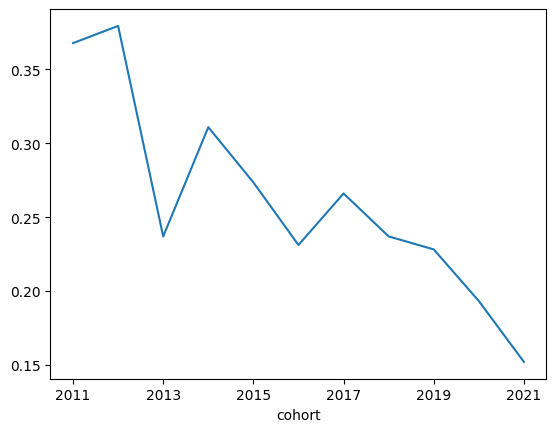

In [89]:
cohort_analysis.div(cohort_analysis[0], axis="index")[1].plot()

In [98]:
from btyd.utils import summary_data_from_transaction_data

summary = summary_data_from_transaction_data(df, "name", "time")

/Users/maksim/opt/miniconda3/lib/python3.9/site-packages/btyd/utils.py:289: UserWarning: Converting to Period representation will drop timezone information.
  pd.to_datetime(transactions[datetime_col].max(), format=datetime_format).to_period(freq).to_timestamp()
/Users/maksim/opt/miniconda3/lib/python3.9/site-packages/btyd/utils.py:205: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  transactions = transactions.set_index(datetime_col).to_period(freq).to_timestamp()


In [111]:
from btyd import ModifiedBetaGeoFitter

# Similar API to scikit-learn.
bgm = ModifiedBetaGeoFitter().fit(summary.frequency, summary.recency, summary["T"])

(array([55730., 29169.,  9248.,  3485.,  2502.,  1775.,  2105.,  2635.,
         3517., 17904.]),
 array([5.10562544e-92, 9.99545487e-02, 1.99909097e-01, 2.99863646e-01,
        3.99818195e-01, 4.99772743e-01, 5.99727292e-01, 6.99681841e-01,
        7.99636390e-01, 8.99590938e-01, 9.99545487e-01]),
 <BarContainer object of 10 artists>)

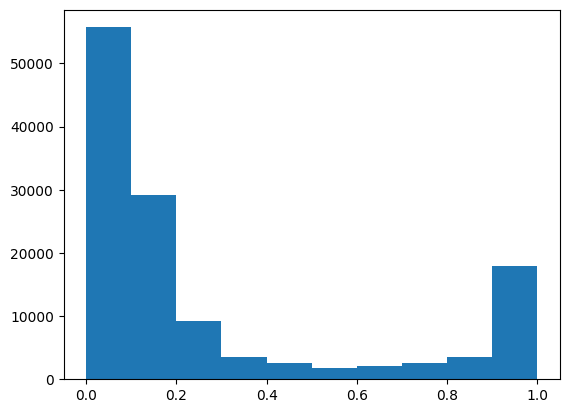

In [112]:
plt.hist(
    bgm.conditional_probability_alive(summary.frequency, summary.recency, summary["T"])
)

In [114]:
summary["p_alive"] = bgm.conditional_probability_alive(
    summary.frequency, summary.recency, summary["T"]
)

In [138]:
summary.sort_values("p_alive", ascending=False).head(30)

,frequency,recency,T,p_alive
name,,,,
Abingdon Boys School - Howling,502.0,3960.0,3960.0,0.999545
FLOW - COLORS,934.0,3947.0,3950.0,0.999507
Nothing's Carved in Stone - Out of Control,571.0,3556.0,3559.0,0.999357
Kalafina - Magia,355.0,3949.0,3950.0,0.999298
Kiyoura Natsumi - Tabi No Tochuu,393.0,3984.0,3986.0,0.999295
Kaneda Tomoko - Ganbara,481.0,3524.0,3527.0,0.999290
Utada Hikaru - Apple And Cinnamon,347.0,3838.0,3839.0,0.999281
IOSYS - Marisa Stole the Precious Thing,308.0,3960.0,3961.0,0.999200
Ally Kerr - The sore feet song,367.0,3943.0,3946.0,0.999181


In [142]:
bgm.conditional_expected_number_of_purchases_up_to_time(
    1, summary["frequency"], summary["recency"], summary["T"]
).sort_values(ascending=False)

name
FLOW - COLORS                                    2.334729e-01
MAN WITH A MISSION - Raise your flag             1.910142e-01
Supercell - Feel so good                         1.831421e-01
Nothing's Carved in Stone - Out of Control       1.582315e-01
Lucy Rose - Shiver                               1.444964e-01
                                                     ...     
Hatsune Miku - Black☆Rock Shooter                1.794880e-71
Galo Sengen                                      2.849758e-77
Hiroyuki Sawano - βios <feat. Mika Kobayashi>    2.664840e-81
ろん - PONPONPON                                   4.771328e-84
ろん & Gero - PONPONPON                            1.276459e-93
Length: 128070, dtype: float64

In [133]:
for i in range(11):
    print(i, f"{bgm.probability_of_n_purchases_up_to_time(365, i)*100:.2f}%")

0 65.78%
1 11.58%
2 5.99%
3 3.83%
4 2.69%
5 1.99%
6 1.52%
7 1.19%
8 0.94%
9 0.76%
10 0.62%


# Period playing


2021-01-01 00:00:00+00:00 2021-01-31 00:00:00+00:00


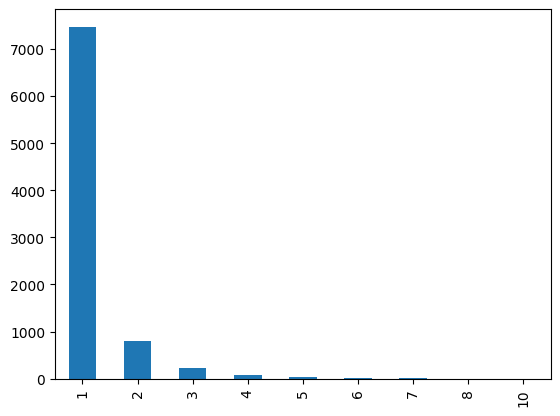

2021-01-01 00:00:00+00:00 2021-03-02 00:00:00+00:00


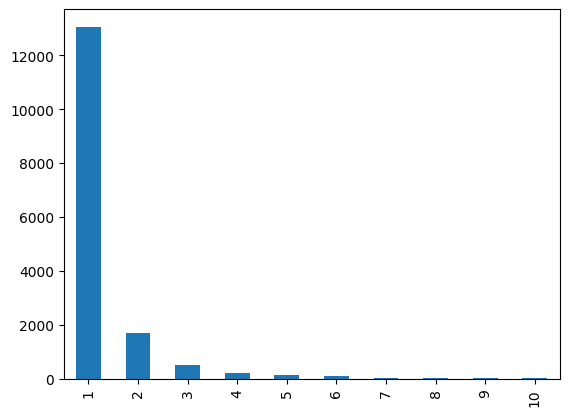

2021-01-01 00:00:00+00:00 2021-04-01 00:00:00+00:00


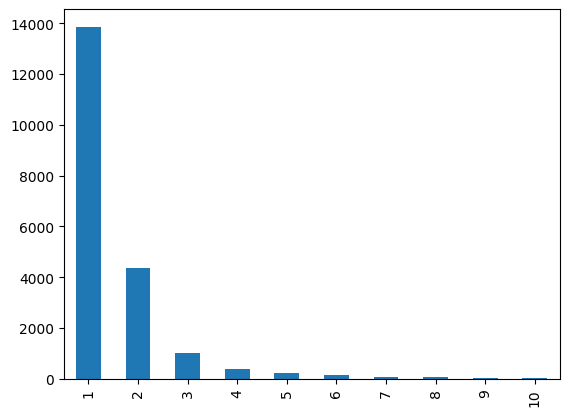

2021-01-01 00:00:00+00:00 2021-05-01 00:00:00+00:00


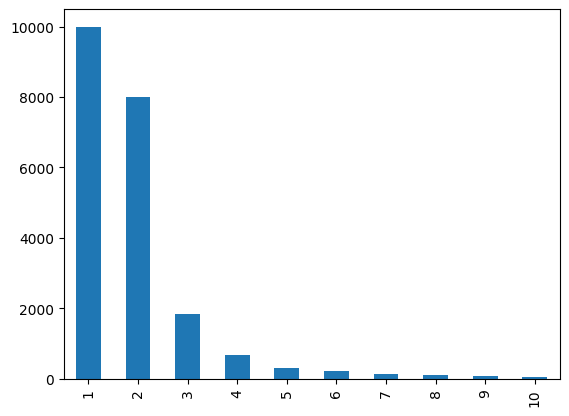

2021-01-01 00:00:00+00:00 2021-05-31 00:00:00+00:00


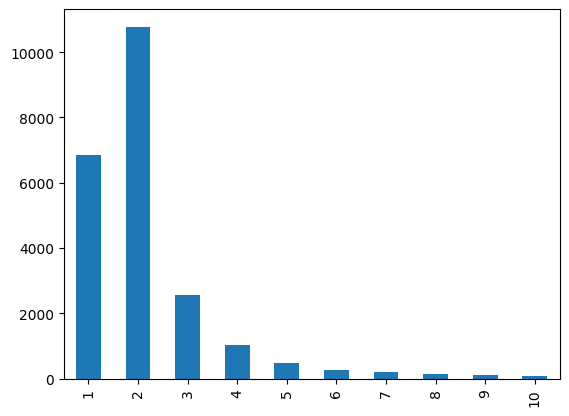

2021-01-01 00:00:00+00:00 2021-06-30 00:00:00+00:00


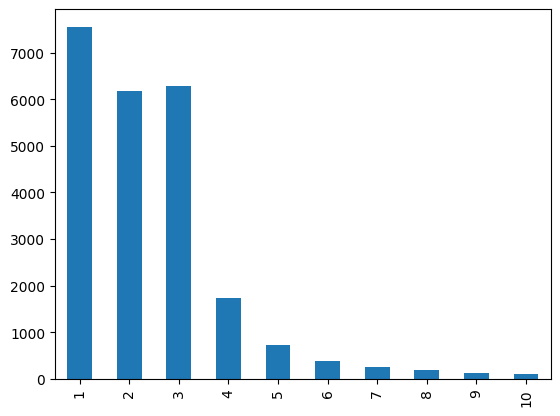

2021-01-01 00:00:00+00:00 2021-07-30 00:00:00+00:00


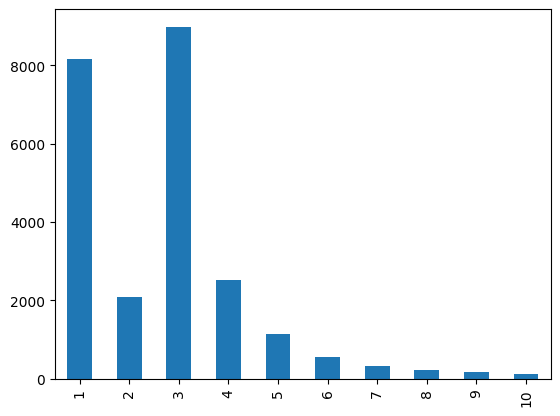

2021-01-01 00:00:00+00:00 2021-08-29 00:00:00+00:00


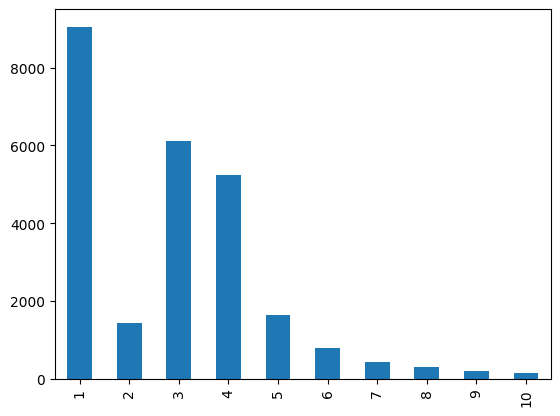

2021-01-01 00:00:00+00:00 2021-09-28 00:00:00+00:00


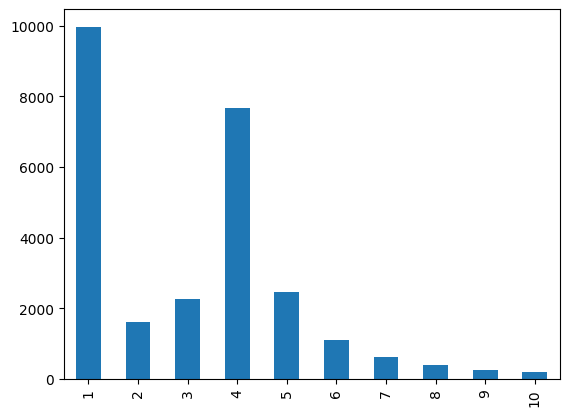

2021-01-01 00:00:00+00:00 2021-10-28 00:00:00+00:00


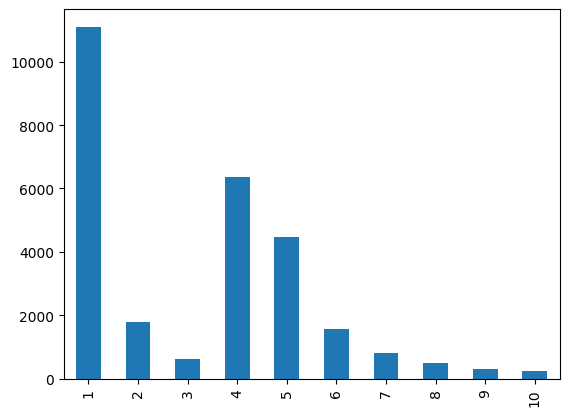

2021-01-01 00:00:00+00:00 2021-11-27 00:00:00+00:00


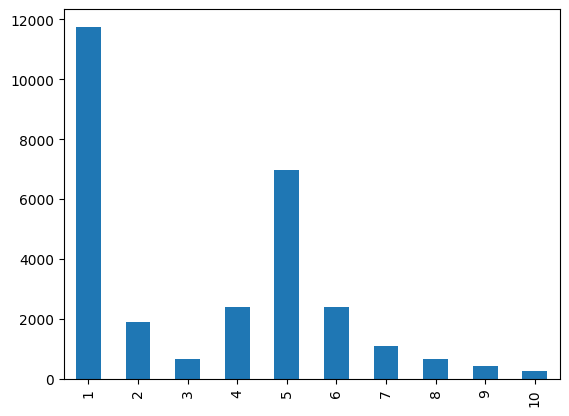

2021-01-01 00:00:00+00:00 2021-12-27 00:00:00+00:00


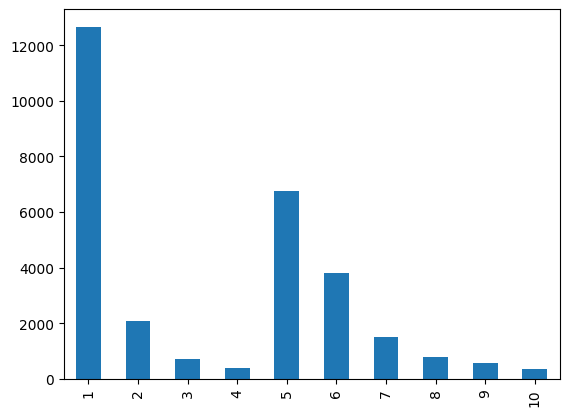

In [92]:
t1 = pd.to_datetime("2021-01-01", utc=True)

for t2 in range(1, 13):
    t2 = t1 + pd.to_timedelta(t2 * 30, unit="d")
    print(t1, t2)
    t = df[df.time.between(t1, t2)]
    t.groupby("name").size().sort_values().value_counts().sort_index().head(10).plot(
        kind="bar"
    )
    plt.show()

<AxesSubplot: >

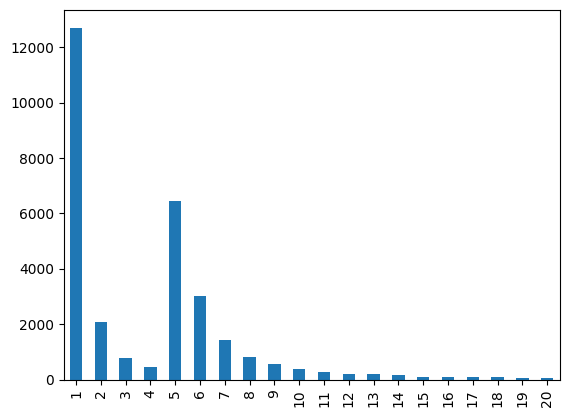

In [103]:
t1 = "2020-01-01"
t2 = "2021-01-01"

t = df[df.time.between(t1, t2)]
t.groupby("name").size().sort_values().value_counts().sort_index().head(20).plot(
    kind="bar"
)

In [74]:
plays4 = t.groupby("name").size().loc[lambda x: x == 4]

<AxesSubplot: >

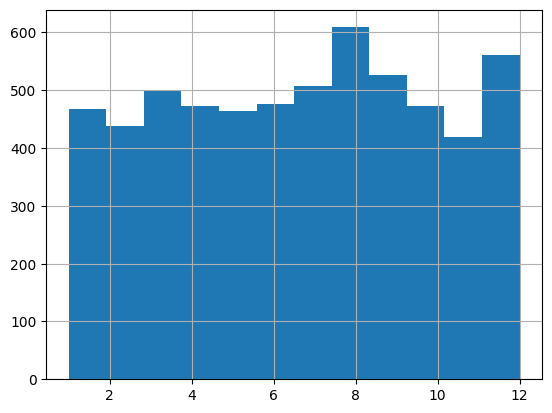

In [77]:
df[df.name.isin(plays4.index)].time.dt.month.hist(bins=12)

In [42]:
plays5 = t.groupby("name").size().loc[lambda x: x == 5]

In [117]:
plays_non_5 = t.groupby("name").size().loc[lambda x: x != 5]

<AxesSubplot: >

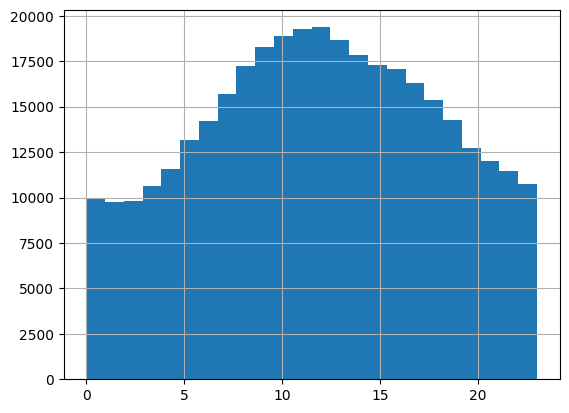

In [72]:
df[df.name.isin(plays5.index)].time.dt.hour.hist(bins=24)

In [102]:
x = plays5.sample().index[0]
print(x)

display(df[df.name == x].assign(year=lambda df: df.time.dt.year).groupby("year").size())
t[t.name == x].time.diff()

Mai Kuraki - TRY AGAIN


year
2016    1
2017    7
2018    6
2019    6
2020    5
2021    5
2022    5
dtype: int64

980771                 NaT
1005199   72 days 23:40:48
1029201   70 days 18:55:21
1053674   71 days 03:37:22
1082090   81 days 15:53:37
1109035   77 days 21:28:33
1135611   78 days 02:58:35
1157779   65 days 08:20:29
1181394   68 days 08:11:16
1203501   64 days 09:13:26
Name: time, dtype: timedelta64[ns]

(0.0, 85.0)

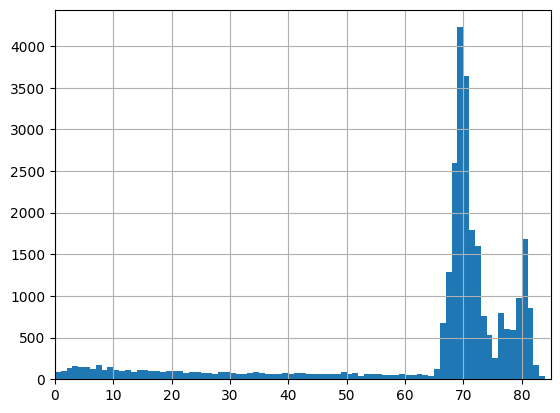

In [114]:
(
    t[t.name.isin(plays5.index)].groupby("name").time.diff().dt.total_seconds()
    / 3600
    / 24
).hist(bins=150, range=(0, 150))
plt.xlim(0, 85)

(0.0, 85.0)

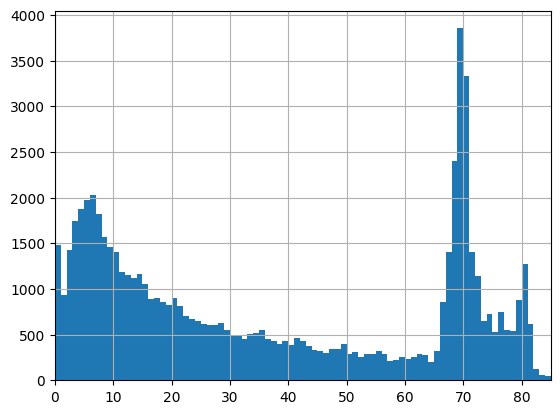

In [118]:
(
    t[t.name.isin(plays_non_5.index)].groupby("name").time.diff().dt.total_seconds()
    / 3600
    / 24
).hist(bins=150, range=(0, 150))
plt.xlim(0, 85)

(0.0, 85.0)

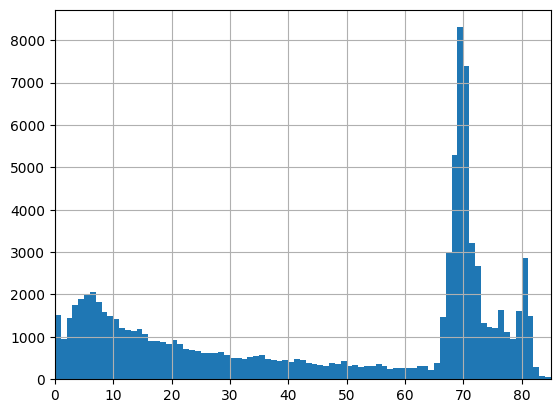

In [119]:
(t.groupby("name").time.diff().dt.total_seconds() / 3600 / 24).hist(
    bins=150, range=(0, 150)
)
plt.xlim(0, 85)

In [127]:
df[
    df.name == "Akasaki Chinatsu, Tomatsu Haruka, Toyosaki Aki - Wa! Moon! Dass! Cry!"
].time.diff().dt.total_seconds().div(3600 * 24).sort_values()

963000      0.352569
1300820     1.132697
931149      1.454456
1119266     2.640706
1243087     3.139850
1192646     3.520475
1083745     3.627384
964216      3.650764
939724      4.527396
965825      4.589468
1108653     4.990903
970655      5.112338
1013099     5.221771
1082494     5.349931
1014904     5.484421
999052      5.508160
1226278     5.581204
1020792     5.610208
984323      5.653796
972561      5.852940
1085754     5.903819
1050206     6.314722
1011411     6.604074
1001369     6.868831
1195222     7.464514
1262185     8.242488
1303691     8.386875
1191441     8.640799
1259356     8.914942
968883      9.040544
997173      9.304178
1316847    10.016528
1028849    10.428785
988055     11.116678
943577     11.611123
1161754    11.626019
982546     11.798727
1018946    12.010521
1256274    12.546748
1025169    12.859051
1106932    13.152951
1102467    13.161528
1313428    13.290648
1097925    13.838565
948428     14.365208
1308812    15.083171
1080631    15.504456
1224403    16

In [136]:
r - l + 1

4

In [140]:
119 / 7

17.0

<AxesSubplot: >

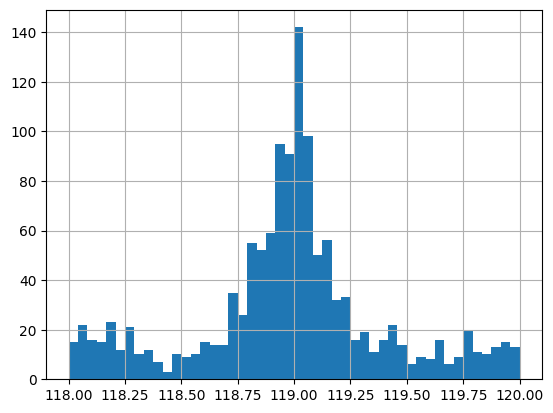

In [143]:
l, r = (118, 120)
df.groupby("name").time.diff().dt.total_seconds().div(3600 * 24).hist(
    bins=(r - l) * 24, range=(l, r)
)

In [145]:
df[
    df.groupby("name")
    .time.diff()
    .dt.total_seconds()
    .div(3600 * 24)
    .between(118.75, 119.25)
]

,time,name
33642,2012-03-21 02:42:47+00:00,Magome Togoshi - 空に光る
35013,2012-03-25 15:52:15+00:00,MUZIK SERVANT - Ballealic light
35066,2012-03-25 19:07:04+00:00,02 Engine Sentai Go - onger
35442,2012-03-27 23:00:09+00:00,Abo Takeshi - Believe Me
39231,2012-04-08 23:17:17+00:00,Rie Kugimiya (釘宮 理恵) - 恋愛サーキュレーション (Ren'Ai Cir...
...,...,...
1312441,2022-10-14 19:31:18+00:00,やくしまるえつこ - わたしは人類
1312481,2022-10-14 21:57:32+00:00,ReoNa - 生命線
1312505,2022-10-14 23:28:31+00:00,Mrs. GREEN APPLE - インフェルノ
1317400,2022-10-29 05:43:00+00:00,Psy s Perfect Style Class - IOSYS x Gangnamcore 2


In [146]:
df[df.name == "MUZIK SERVANT - Ballealic light"]

,time,name
3504,2011-11-27 11:49:34+00:00,MUZIK SERVANT - Ballealic light
35013,2012-03-25 15:52:15+00:00,MUZIK SERVANT - Ballealic light


In [147]:
df[df.name == "02 Engine Sentai Go - onger"]

,time,name
3603,2011-11-27 19:07:19+00:00,02 Engine Sentai Go - onger
35066,2012-03-25 19:07:04+00:00,02 Engine Sentai Go - onger


### Top artists


In [20]:
artists_series = df.name.str.split("-").apply(lambda x: x[0])
artists = (
    artists_series.value_counts()
    .rename_axis("artist_name")
    .reset_index(name="play counts")
)

print(f"A total of {len(artists)} unique artists have been played on r/a/dio")

artists.head(25)

A total of 41272 unique artists have been played on r/a/dio


,artist_name,play counts
0,Hatsune Miku,7434
1,3L,5481
2,Kalafina,5175
3,Yuki Kajiura,4856
4,Shoji Meguro,4699
5,IOSYS,4691
6,Demetori,4490
7,Itou Kanako,4429
8,JAM Project,4095
9,Daisuke Ishiwatari,3998


In [21]:
artists.describe()

,play counts
count,41272.000000
mean,31.945750
std,158.260023
min,1.000000
25%,1.000000
50%,2.000000
75%,9.000000
max,7434.000000


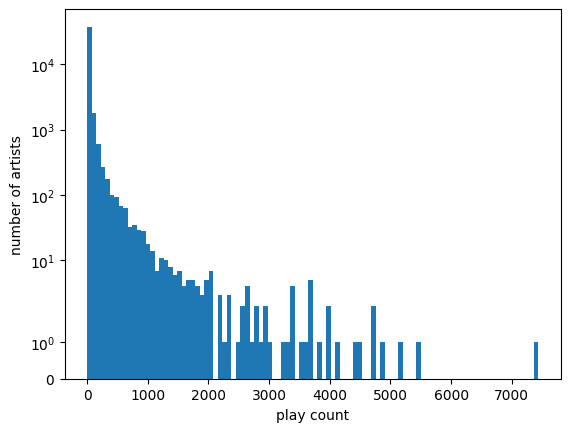

In [22]:
ax = plt.subplot()
ax.set_yscale("symlog")
ax.hist(artists["play counts"], bins=100)
ax.set_ylabel("number of artists")
_ = ax.set_xlabel("play count")